# Correlation

Notebook created for Regression in Psychology [PSYCH–GA.2229](https://docs.google.com/document/d/10AW7g92O6BtX61kXVIkHtL4j_k3P_G5f/edit?usp=sharing&ouid=100340169590558171318&rtpof=true&sd=true) graduate level course at New York University by [Dr. Madalina Vlasceanu](https://www.mvlasceanu.com/)

This content is Open Access (free access to information and unrestricted use of electronic resources for everyone).

Sources: Navarro, D. (2013). Learning statistics with R: https://learningstatisticswithr.com/

## What is correlation?

Correlation is a statistical measure that expresses the extent to which two variables are linearly related (meaning they change together at a constant rate). That is, a correlation captures the association between 2 variables.

Example: Is my sleep associated / correlated with my grumpiness? Yes, the more I sleep, the less grumpy I am. Thus, the correlation between sleep and grumpiness is negative.

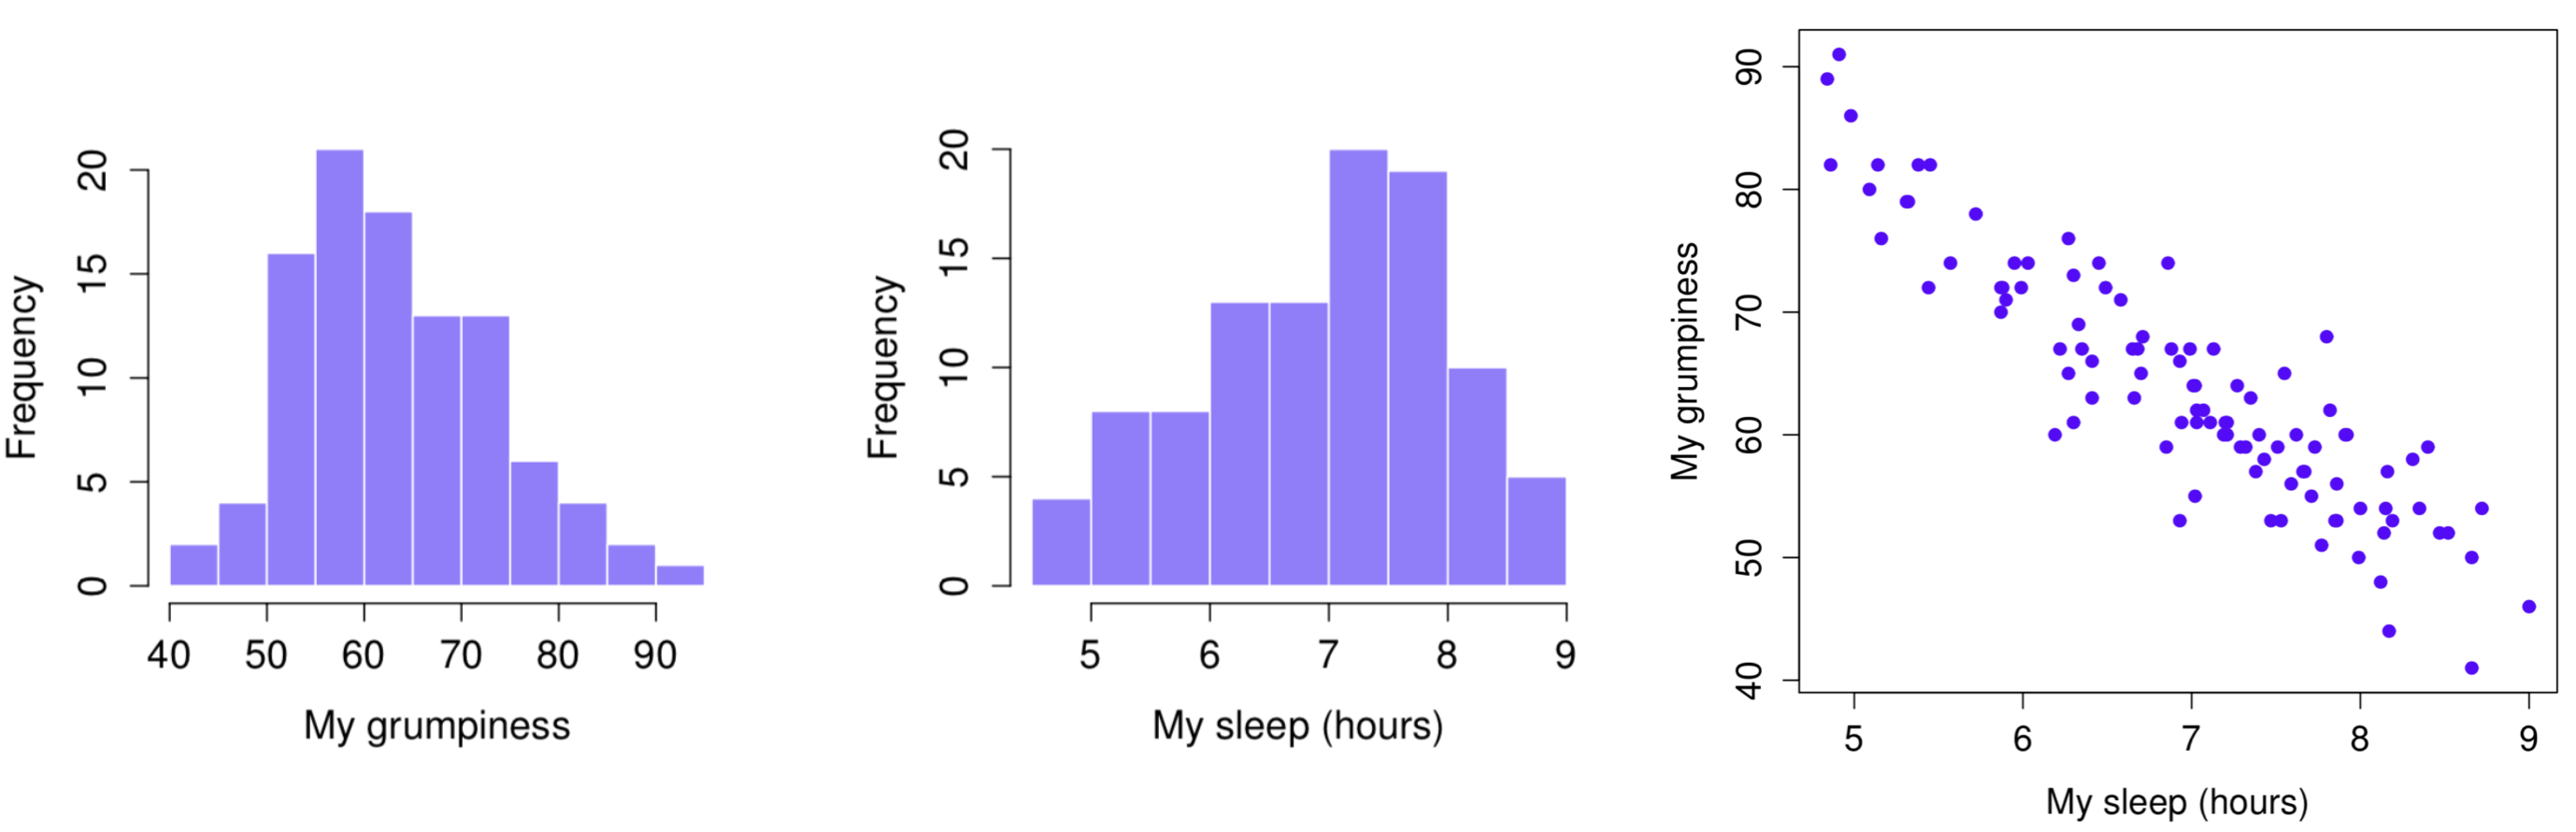


# Correlation coefficient

The correlation coefficient caputers the magnitude and the direction (positive or negative) of the correlation.

- Varies from –1 to 1
- r = –1 it means there is a perfect negative relationship
- r = 1 it means there is a perfect positive relationship
- r = 0, there is no relationship at all

How is the correlation coefficient calculated?

The covariance between two variables X and Y is a generalization of the notion of the variance; it’s a mathematically simple way of describing the relationship between two variables.

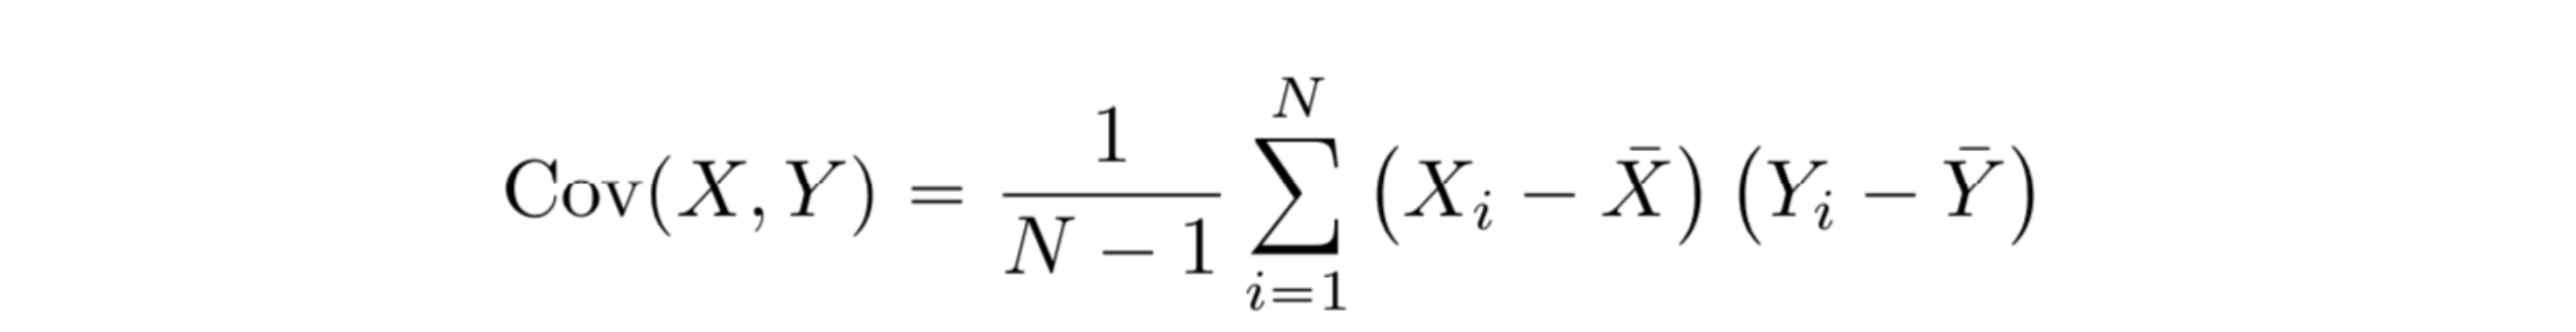

The Pearson correlation measures the strength of the linear relationship between two variables.

The Pearson correlation coefficient r standardizes the covariance, in the same way the z-score standardizes a raw score: by dividing by the standard deviation.

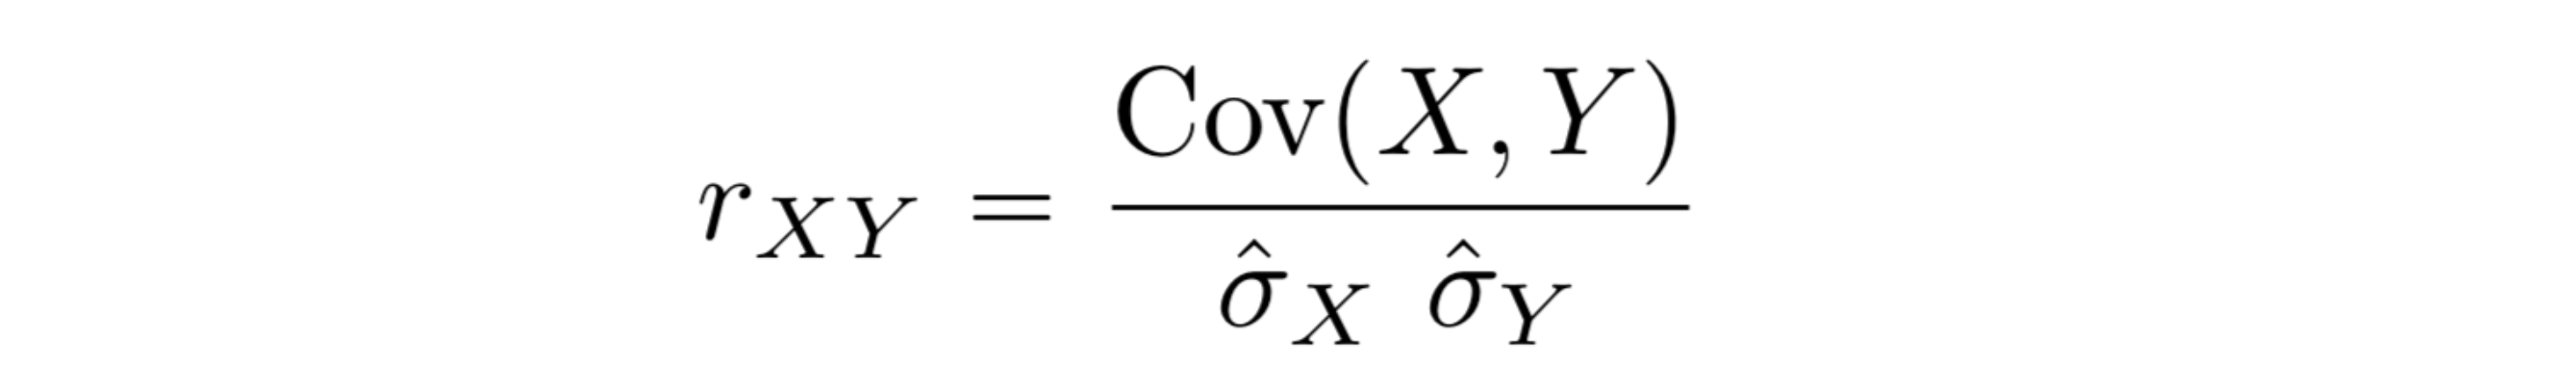

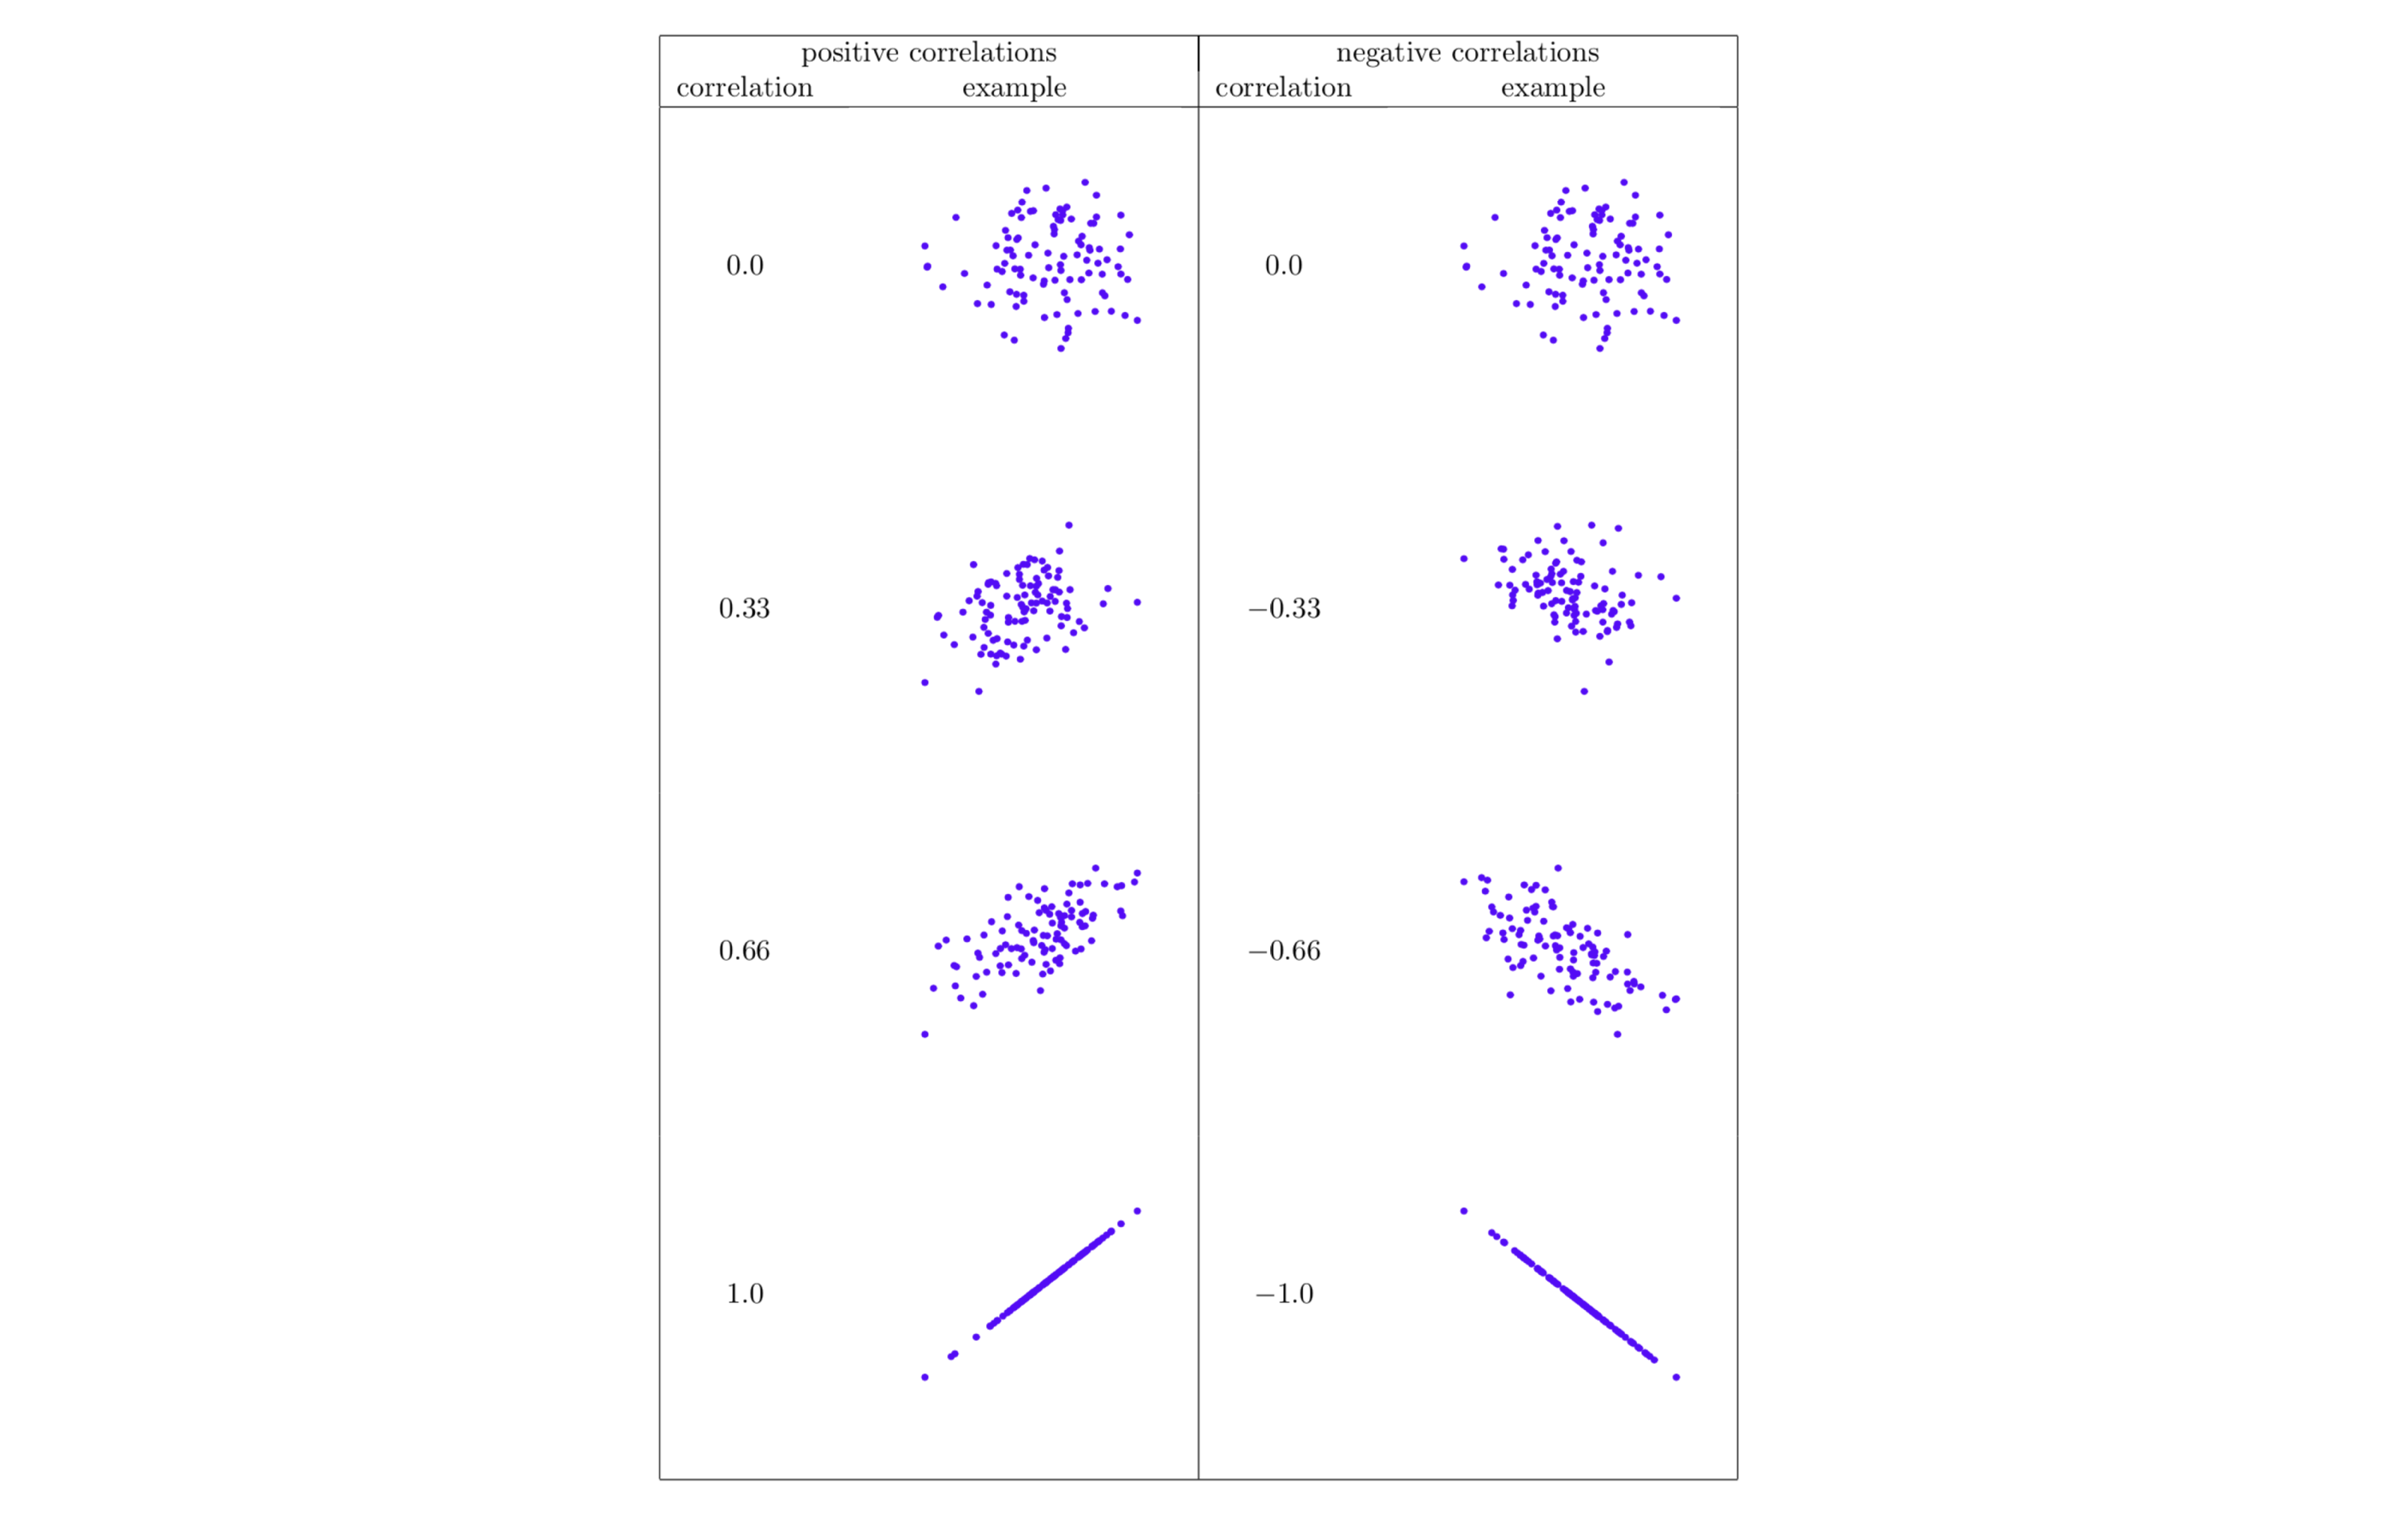

## How about non-contunous variables?

The Spearman’s rank correlation measures the correlation between non-continuous variables.

# Let's practice running correlations

In [1]:
# import libraries

import pandas as pd
from scipy import stats
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import data downloaded from https://github.com/mvlasceanu/RegressionData/blob/main/data.xlsx
#df = pd.read_excel('data.xlsx')

# Or you can read the Excel file directly from the URL
url = 'https://github.com/mvlasceanu/RegressionData/raw/main/data.xlsx'
df = pd.read_excel(url)

df.head(2)

,Response ID,GENDER,AGE,PARTY,TWITTER,TRUST,RU1,RU2,RU3,RU4,...,Post23,Post24,Post25,Post26,Post27,Post28,Post29,Post30,Post31,Post32
0,R_0cj5dsJg2wfpiuJ,1,18,1,0,95,4.0,26,0,-5,...,69,60,20,58,84,22,42,77,90,71
1,R_0rkhLjwWPHHjnTX,0,19,2,1,76,-5.0,16,3,-1,...,58,82,38,61,36,40,62,68,46,43


In [3]:
# corelate trust in science with age
# Run a Pearson Correlation for continuous variables
# the first output is the correlation coefficient r
# the second output is the p-value significance level

stats.pearsonr(df.AGE, df.TRUST)

PearsonRResult(statistic=0.012687557785958276, pvalue=0.8584782150756923)

In [4]:
# Run a Spearman Correlation for rank variables
stats.spearmanr(df.AGE, df.TRUST)

SignificanceResult(statistic=0.0248282977917326, pvalue=0.7271057552670346)

# Plots

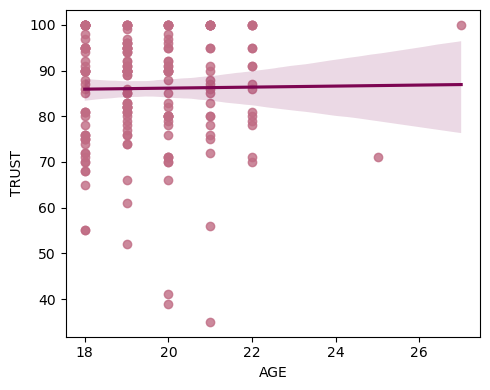

In [5]:
# Make a simple regression plot

# Create the figure
fig, ax = plt.subplots(1,1, figsize=(5,4))

# Plot the line
sns.regplot(x=df.AGE, y=df.TRUST, scatter_kws={"color": "#C06C84"}, line_kws={"color":"#7D0552"}, ax=ax)

# Include this command such that all the elements of the plot appear in the figure
plt.tight_layout()

# Save figure
plt.savefig('figure.tif', dpi=300, format="tiff")

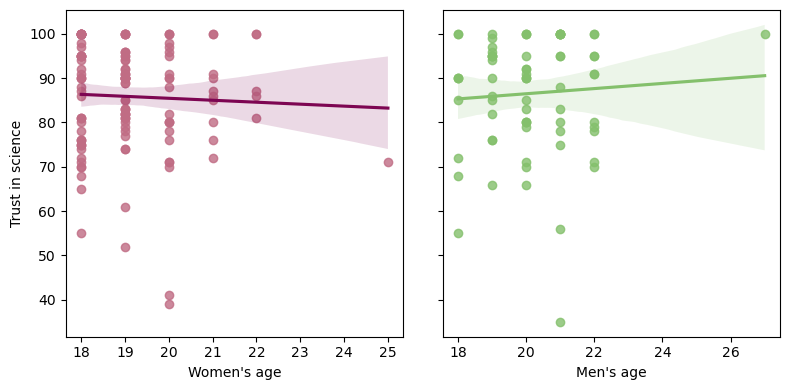

In [6]:
# Create the figure with 2 panels that share the y axis
fig, ax = plt.subplots(1,2, figsize=(8,4), sharey=True)

# Plot the line of women's age against their trust in science
sns.regplot(x=df.query('GENDER==1')['AGE'], y=df.query('GENDER==1')['TRUST'], scatter_kws={"color": "#C06C84"}, line_kws={"color":"#7D0552"}, ax=ax[0])

# Plot the line of men's age against their trust in science
sns.regplot(x=df.query('GENDER==0')['AGE'], y=df.query('GENDER==0')['TRUST'], scatter_kws={"color": "#84C06C"}, line_kws={"color":"#84C06C"}, ax=ax[1])

# label the x axis
ax[0].set_xlabel("Women's age")
ax[1].set_xlabel("Men's age")

# label the y axis
ax[0].set_ylabel("Trust in science")
ax[1].set_ylabel(" ")

# Include this command such that all the elements of the plot appear in the figure
plt.tight_layout()

# Save figure
plt.savefig('figure.tif', dpi=300, format="tiff")

Let's recreate the figure above but remove the scatter dots

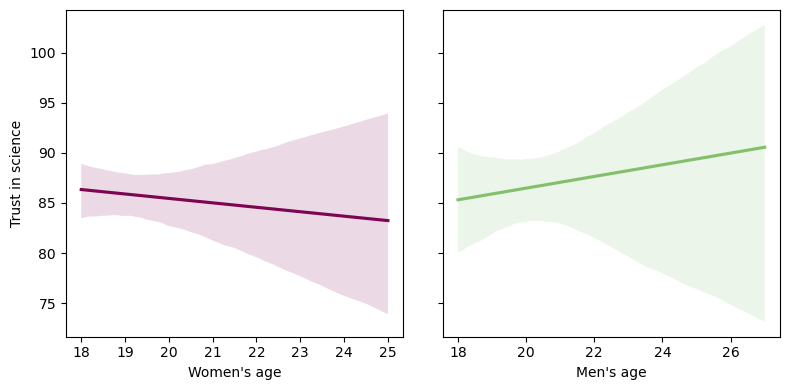

In [7]:
# Create the figure with 2 panels that share the y axis
fig, ax = plt.subplots(1,2, figsize=(8,4), sharey=True)

# Plot the line of women's age against their trust in science
sns.regplot(x=df.query('GENDER==1')['AGE'], y=df.query('GENDER==1')['TRUST'], scatter=False, line_kws={"color":"#7D0552"}, ax=ax[0])

# Plot the line of men's age against their trust in science
sns.regplot(x=df.query('GENDER==0')['AGE'], y=df.query('GENDER==0')['TRUST'], scatter=False, line_kws={"color":"#84C06C"}, ax=ax[1])

# label the x axis
ax[0].set_xlabel("Women's age")
ax[1].set_xlabel("Men's age")

# label the y axis
ax[0].set_ylabel("Trust in science")
ax[1].set_ylabel(" ")

# Include this command such that all the elements of the plot appear in the figure
plt.tight_layout()

# Save figure
plt.savefig('figure.tif', dpi=300, format="tiff")

# Another example

In [8]:
# import data downloaded from https://github.com/mvlasceanu/RegressionData/blob/da060297aea7dccb040a16be2a744b3310a3f948/data.csv
# df = pd.read_excel('data.xlsx')

# Or you can read the Excel file directly from the URL
url = 'https://github.com/mvlasceanu/RegressionData/raw/da060297aea7dccb040a16be2a744b3310a3f948/data.csv'
df = pd.read_csv(url)
df.head(2)

,ResponseId,condName,BELIEFcc,POLICYcc,SHAREcc,WEPTcc,Intervention_order,Belief1,Belief2,Belief3,...,Age,Politics2_1,Politics2_9,Edu,Income,Indirect_SES,MacArthur_SES,PerceivedSciConsensu_1,Intro_Timer,condition_time_total
0,R_1d6rdZRmlD02sFi,FutureSelfCont,100.0,100.0,0.0,8,PolicySocialM,100,100,100,...,40,100.0,NaN,2.0,1.0,"2,3,4,6,7",7,81,25.566,1043.866
1,R_1CjFxfgjU1coLqp,Control,100.0,100.0,0.0,1,PolicySocialM,100,100,100,...,50,3.0,5.0,4.0,NaN,"1,3,4,5,6,7",9,96,16.697,367.657


In [9]:
# get the correlation matrix of the 4 outcome variables: beliefs, policy support, sharing intentions, and trees planted

df[["BELIEFcc", "POLICYcc", "SHAREcc", "WEPTcc"]].corr()

,BELIEFcc,POLICYcc,SHAREcc,WEPTcc
BELIEFcc,1.000000,0.810957,0.253270,-0.005551
POLICYcc,0.810957,1.000000,0.381650,0.016097
SHAREcc,0.253270,0.381650,1.000000,-0.018039
WEPTcc,-0.005551,0.016097,-0.018039,1.000000


<Axes: >

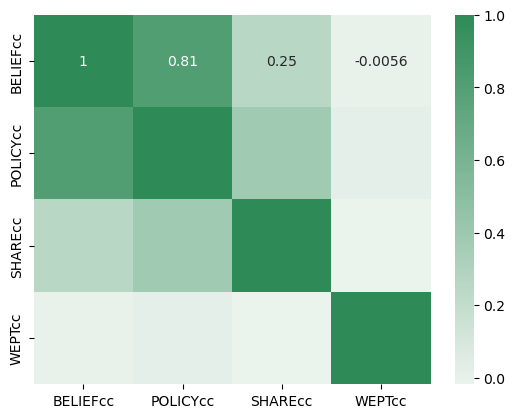

In [10]:
# create a color pallette
color = sns.light_palette("seagreen", as_cmap=True)

# plot a heatmap of the correlation matrix created above
sns.heatmap(df[["BELIEFcc", "POLICYcc", "SHAREcc", "WEPTcc"]].corr(), cmap=color, annot=True)

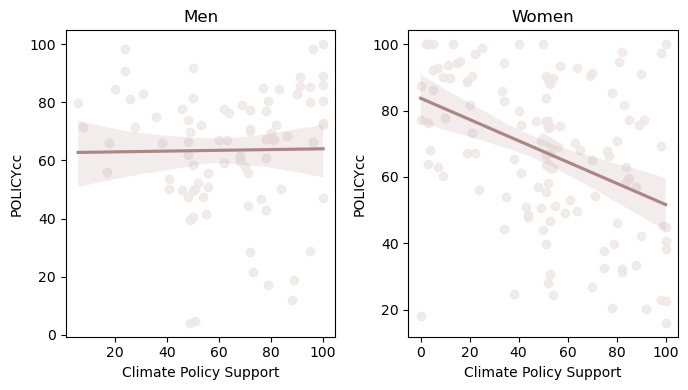

In [11]:
# plot the linear relationship between ideological conservatism and climate policy support, for men and women

fig, ax = plt.subplots(1,2, figsize=(7,4))

sns.regplot(x='Politics2_1', y='POLICYcc', data=df.query('Gender == 1') , scatter_kws={"color": "#EFE7E7"}, line_kws={"color":"#AD8585"}, ax=ax[0])
sns.regplot(x='Politics2_1', y='POLICYcc', data=df.query('Gender == 2') , scatter_kws={"color": "#EFE7E7"}, line_kws={"color":"#AD8585"}, ax=ax[1])

ax[0].set_xlabel('Conservativism')
ax[1].set_xlabel('Conservativism')

ax[0].set_xlabel('Climate Policy Support')
ax[1].set_xlabel('Climate Policy Support')

ax[0].set_title( "Men" , size = 12 )
ax[1].set_title( "Women" , size = 12 )

plt.tight_layout()

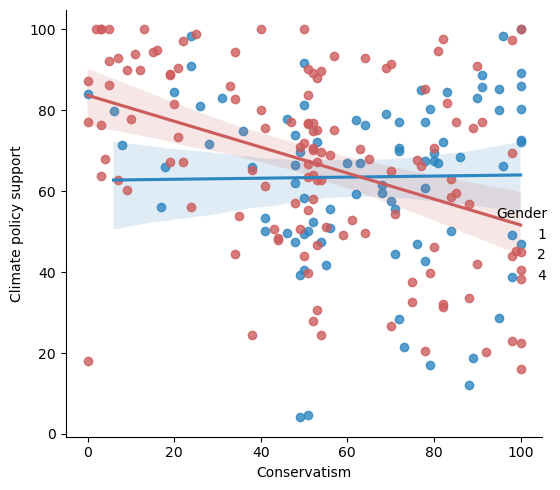

In [12]:
colors = ["#2E86C1", "#CD5C5C"]

sns.lmplot(x='Politics2_1', y='POLICYcc', hue='Gender', data=df, palette=colors)

plt.ylabel('Climate policy support')
plt.xlabel('Conservatism')

plt.tight_layout()

# Correlation power analysis

Compute power: WebPower: https://webpower.psychstat.org/wiki/models/index

Posthoc: after you ran the study, you want to see how much power you had, given:
- what sample size you collected was
- What correlation coefficient you observed was
- How many other variables you controlled for
- What was the p-value
- Leave “power” field empty (that’s what you want to compute)

A priori: before you run the study, you want to see what sample size you need to detect a power of at least (Typically 0.8):
- leave the sample size field open, that’s what you want to calculate
- say what’s the minimum correlation you want to detect?
- How many vars are you controlling for?
- At what sig level?
- How much power do you want?

In you paper, you would say:
“For a power analysis we used the software webpower (Zhang & Yuan, 2018), and we calculated that in order to detect a correlation of at least r=0.1, at a significance level of 0.05, in a two sided comparison, with a power of 0.95, we need a sample size of 1293 observations (participants).”

Citation for webpower:
Zhang, Z., & Yuan, K.-H. (2018). Practical Statistical Power Analysis Using Webpower and R (Eds). Granger, IN: ISDSA Press.